Title: L1 vs L2 Minimization
Date: December 7, 2016

This is a simple example and implementation of regression by minimizing the L1 or L2 norm.

The model is the coefficients in the equation of motion for a projectile over time
$$
y(t) = m_0 + m_1 t - (1/2) m_2 t^2
$$
With model parameters $m = \left[m_1, m_2, m_3\right]^T$

Time is measured at specific times, and the position of the projectile is recorded $d = \left[y(t_1), y(t_2), \dots , y(t_n)\right]^T$

The relationship between $d$ and $m$ can be modelled as a linear system of matrix $G$
$$
G ~ m = d
$$
With rows $G_i = \left[1, ~ t_i, -(1/2) ~ t_i^2\right]$

The L2 minimizing solution, aka the least squares solution, can be done directly
$$
m_{L_2} = (G^T G)^{-1} G^T d
$$
However it is very sensitive to outliers within the data. All coefficients will be pulled to try and fit the outlier.

In contrast the L1 minimizing solution will not appreciably change to accomodate an outlier and is more robust.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(G, m_true, m_est, m_est_label='', title=''):
    plt.scatter(G[:, 1], d, label='data')
    xs = np.linspace(G[0, 1], G[-1, 1], 100)
    ys = m_est[0] + m_est[1] * xs - 0.5 * m_est[2] * xs * xs
    true_ys = m_true[0] + m_true[1] * xs - 0.5 * m_true[2] * xs * xs
    plt.plot(xs, ys, label=m_est_label)
    plt.plot(xs, true_ys, 'r--', label=r'$m_{true}$')
    plt.xlabel('t (s)')
    plt.ylabel('y (m)')
    plt.legend(loc='best')
    plt.title(title)

In [3]:
def min_L2_norm_solution(d, G):
    lhs = G.T @ G
    rhs = G.T @ d
    inv = np.linalg.inv(lhs)
    m = inv @ rhs

    return m

def min_L1_norm_solution(d, G, iterations=10, epsilon = 0.01):
    m = min_L2_norm_solution(d, G).T

    for i in range(iterations):
        res = d - G @ m
        res[np.abs(res) < epsilon] = epsilon
        R = np.identity(np.size(d, 0))
        R[np.diag_indices_from(R)] = 1 / np.abs(res)

        lhs = (G.T @ R) @ G
        rhs = (G.T @ R) @ d
        inv = np.linalg.inv(lhs)

        m = (inv @ rhs).T

    return m

In [4]:
# True model (unknown) and observed data (known)
m = np.array([10, 100, 9.8]).T
d = np.array([109.4, 187.5, 267.5- 150, 331.9, 386.1, 428.4, 452.2, 498.1, 512.3, 513.0]).T

In [5]:
# Construct G matrix
G = np.zeros((np.size(d, 0), np.size(m, 0)))
G[:, 0] = 1
G[:, 1] = np.cumsum(G[:, 0])
G[:, 2] = -0.5 * G[:, 1] * G[:, 1]

print(G)

[[  1.    1.   -0.5]
 [  1.    2.   -2. ]
 [  1.    3.   -4.5]
 [  1.    4.   -8. ]
 [  1.    5.  -12.5]
 [  1.    6.  -18. ]
 [  1.    7.  -24.5]
 [  1.    8.  -32. ]
 [  1.    9.  -40.5]
 [  1.   10.  -50. ]]


L2 solution =  [-11.09166667  95.26674242   8.2719697 ]


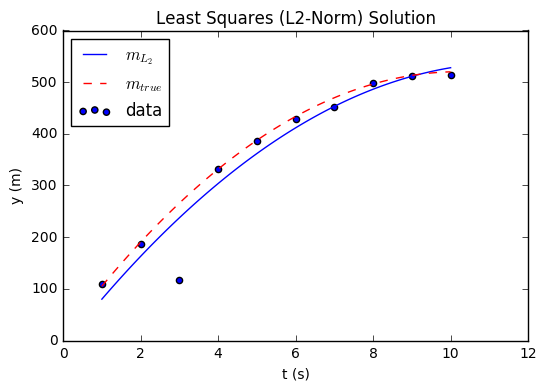

In [7]:
m_l2 = min_L2_norm_solution(d, G)
print("L2 solution = ", m_l2)
display(G, m, m_l2, r'$m_{L_2}$', 'Least Squares (L2-Norm) Solution')

L1 solution =  [ 17.14221124  96.98914788   9.48049602]


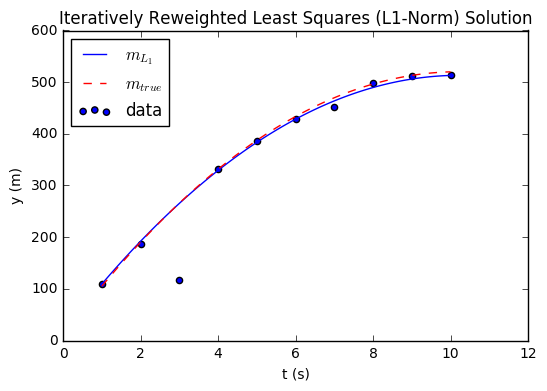

In [8]:
m_l1 = min_L1_norm_solution(d, G, 100)
print("L1 solution = ", m_l1)
display(G, m, m_l1, r'$m_{L_1}$', 'Iteratively Reweighted Least Squares (L1-Norm) Solution')